# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
!rm titanic_train.csv
!wget https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv

--2025-02-21 05:48:07--  https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv [following]
--2025-02-21 05:48:08--  https://raw.githubusercontent.com/davidjohnnn/all_datasets/master/bay/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  58.89K  --.-KB/s    in 0.009s  

2025-02-21 05:48:08 (6.40 MB/s) - ‘titanic_train.csv’ saved [60302/60302]



In [ ]:
df = pd.read_csv('https://github.com/davidjohnnn/all_datasets/raw/master/bay/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop(['Name'],axis=1,inplace=True)
df.drop(['Ticket'],axis=1,inplace=True)

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Prepare Data

Let's begin some exploratory data analysis! We'll start by checking out missing data!



## Check Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

In [ ]:
# Embarked has 3 unique values
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
print(len(df['Cabin'].unique()))

148


In [ ]:
# Cabin has too many missing value, so drop it
df.drop(['Cabin'],axis=1,inplace=True)

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

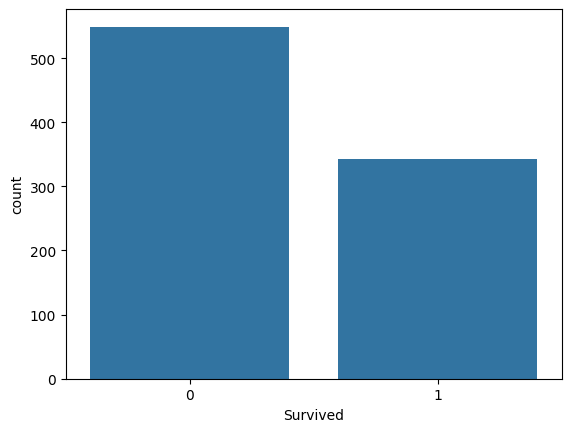

In [ ]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived', data=df)

___
## Data Cleansing


In [ ]:
# find age mean in each class
mean_class1 = df[df['Pclass'] == 1]['Age'].mean()
mean_class2 = df[df['Pclass'] == 2]['Age'].mean()
mean_class3 = df[df['Pclass'] == 3]['Age'].mean()

# fill NaN data in each class with that class mean
df.loc[(df['Pclass'] == 1) & (df['Age'].isnull()), 'Age'] = mean_class1
df.loc[(df['Pclass'] == 2) & (df['Age'].isnull()), 'Age'] = mean_class2
df.loc[(df['Pclass'] == 3) & (df['Age'].isnull()), 'Age'] = mean_class3

# fill NaN data in Embarked with Embarked mode (value that appear the most frequently)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

print('Age Mean')
print('mean = ',df['Age'].mean())
print('mean_class1 =', mean_class1)
print('mean_class2 =', mean_class2)
print('mean_class3 =', mean_class3)
print('Embarked Mode =', df['Embarked'].mode().iloc[0])

Age Mean
mean =  29.292874790272087
mean_class1 = 38.233440860215055
mean_class2 = 29.87763005780347
mean_class3 = 25.14061971830986
Embarked Mode = S


In [ ]:
# check again!
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
# one-hot encoding without drop_first=True

# male  female
# 1     0
# 0     1
# 1     0
# 0     1

# one-hot encoding with drop_first=True, it drops the first column (e.g., "female")
# male
# 1
# 0
# 1
# 0
# Now, "female" is implied as 0, and "male" is 1

In [ ]:
# The one-hot encoding without drop_first=True
# C  Q  S
# 1  0  0
# 0  1  0
# 0  0  1
# 0  0  1

# With drop_first=True, one column is dropped
# Q  S
# 0  0  # C is now (0,0)
# 0  1  # S is now (0,1)
# 1  0  # Q is now (1,0)

In [ ]:
# df before one-hot
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00000,1,0,7.2500,S
1,1,1,female,38.00000,1,0,71.2833,C
2,1,3,female,26.00000,0,0,7.9250,S
3,1,1,female,35.00000,1,0,53.1000,S
4,0,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S
887,1,1,female,19.00000,0,0,30.0000,S
888,0,3,female,25.14062,1,2,23.4500,S
889,1,1,male,26.00000,0,0,30.0000,C


In [ ]:
# one-hot encoding with drop_first=True to dummies
sex = pd.get_dummies(df['Sex'],drop_first=True)
embarked = pd.get_dummies(df['Embarked'],drop_first=True)
#pclass = pd.get_dummies(df['Pclass'],drop_first=True)

In [ ]:
# df after put one-hot dummies to df
df = pd.concat([df,sex],axis=1)
df = pd.concat([df,embarked],axis=1)
#df = pd.concat([df,pclass],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.00000,1,0,7.2500,S,True,False,True
1,1,1,female,38.00000,1,0,71.2833,C,False,False,False
2,1,3,female,26.00000,0,0,7.9250,S,False,False,True
3,1,1,female,35.00000,1,0,53.1000,S,False,False,True
4,0,3,male,35.00000,0,0,8.0500,S,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00000,0,0,13.0000,S,True,False,True
887,1,1,female,19.00000,0,0,30.0000,S,False,False,True
888,0,3,female,25.14062,1,2,23.4500,S,False,False,True
889,1,1,male,26.00000,0,0,30.0000,C,True,False,False


In [ ]:
df.drop(['Sex'],axis=1,inplace=True)
df.drop(['Embarked'],axis=1,inplace=True)
#df.drop(['Pclass'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).



## Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Survived',axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=101)

## Training and Predicting

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(list(y_test[:5]))
print(y_pred[:5])

[0, 0, 0, 1, 0]
[0 0 0 0 1]


Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[145,  20],
       [ 44,  59]])

In [ ]:
print(classification_report(y_test,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7672    0.8788    0.8192       165
           1     0.7468    0.5728    0.6484       103

    accuracy                         0.7612       268
   macro avg     0.7570    0.7258    0.7338       268
weighted avg     0.7594    0.7612    0.7535       268



## Check model parameters

In [ ]:
print(X.columns)
print(model.intercept_)
print(model.coef_)

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')
[4.9809132]
[[-1.13531659 -0.03796987 -0.30149484 -0.17429147  0.00356415 -2.88288949
   0.36839075 -0.06844587]]


## Compute odds ratio for “Age”

In [ ]:
print(model.coef_[0][1])

-0.03796987187233807


In [ ]:
# Extract coefficient for Age
age_coef = model.coef_[0][1]

# Compute odds
odds_age_1 = np.exp(age_coef)  # Odds when Age = 1
odds_age_0 = np.exp(0)  # Odds when Age = 0 (baseline, always 1)

# Compute odds ratio
odds_ratio_age = odds_age_1 / odds_age_0

# Compute percentage change
percentage_change = (1 - odds_ratio_age) * 100

# Print results
print(f"Odds (Age=1) = e^({age_coef:.8f}) = {odds_age_1:.5f}")
print(f"Odds (Age=0) = e^(0) = {odds_age_0:.5f}")
print(f"Odds Ratio (Age) = {odds_ratio_age:.5f} ({percentage_change:.3f}%)")

if odds_ratio_age < 1:
    print(f"When age increases by 1 year, the odds decrease by {abs(percentage_change):.3f}%.")
else:
    print(f"When age increases by 1 year, the odds increase by {percentage_change:.3f}%.")


Odds (Age=1) = e^(-0.03796987) = 0.96274
Odds (Age=0) = e^(0) = 1.00000
Odds Ratio (Age) = 0.96274 (3.726%)
When age increases by 1 year, the odds decrease by 3.726%.


## Summary

    2.1 Use all variables
        	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked
    2.2 Impute missing values
        2.2.1 Impute categorical with mode
        Sex -> Male with True false
        Embarked
        Q  S
        0  0  # C is now (0,0)
        0  1  # S is now (0,1)
        1  0  # Q is now (1,0)
        Embarked Mode = S

        2.2.2 Improve how to impute “Age”. Rather than just using an average for the whole passengers, we should impute age differently for each passenger class (Pclass).
        mean_class1 = 38.233440860215055
        mean_class2 = 29.87763005780347
        mean_class3 = 25.14061971830986

    2.3 Some variables should be dropped manually.
        drop PassengerId, Name, Ticket, Cabin,

    2.4 Evaluate and compare these improvements in 2.1-2.2 to the simple model in Demo which are applied 2 variables i.e. Age, Sex.  Student can report in terms of Macro F1; which one is better?
      Macro F1 in demo = 0.7186
      Marco F1 in inclass = 0.7338
      Marco F1 in inclass is better.

    2.5 Compute odds ratio for “Age” and Explain (Hint อายุเพิ่ม 1 ปี ส่งผลให้ค่า odd เพิ่มขึ้น/ลดลง กี่ %)
      odd(Age=1) = e^(-0.03796987) = 0.96274
      odd(Age=0) = e^0 = 1
      odds ratio (Age) = 0.96274/1 = 0.96274 (-3.726%)
      when age increses by 1 year, it has lower odds by 3.726 %

